<a href="https://colab.research.google.com/github/JotaDC/TelecomX_parte2/blob/main/TelecomX_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Telecom X (Parte 2)

La nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.


##📂 Carga y lectura de los datos

Los datos a utilizar son los trabajados en TelecomX parte 1. [Github TelecomX](https://github.com/JotaDC/TelecomX)

In [43]:
import pandas as pd
import numpy as np
url="datos_tratados.csv"
df=pd.read_csv(url)
df.head()

,id_cliente,se_fue,genero,mayor_de_65,pareja,dependientes,meses_de_contrato,suscripcion_telefonia,suscripcion_a_mas_de_una_linea_telefonica,suscripcion_internet,...,suscripcion_proteccion_de_dispositivos,suscripcion_soporte_tecnico,suscripicion_streaming_tv,suscripcion_streaming_peliculas,tipo_contrato,factura_online,forma_de_pago,total_mensual,total_gastado,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


##🛠️ Preparación de los Datos

###Listar valores unicos por columna

In [44]:
#Listar valores unicos por columna
for col in df.columns:
   print(f"Valores unicos para la columna {col}:")
   print(df[col].unique())
   print("-"*80)

Valores unicos para la columna id_cliente:
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
--------------------------------------------------------------------------------
Valores unicos para la columna se_fue:
['No' 'Yes']
--------------------------------------------------------------------------------
Valores unicos para la columna genero:
['Female' 'Male']
--------------------------------------------------------------------------------
Valores unicos para la columna mayor_de_65:
[0 1]
--------------------------------------------------------------------------------
Valores unicos para la columna pareja:
['Yes' 'No']
--------------------------------------------------------------------------------
Valores unicos para la columna dependientes:
['Yes' 'No']
--------------------------------------------------------------------------------
Valores unicos para la columna meses_de_contrato:
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 

In [45]:
#Listar Nombres de las columnas
df.columns

Index(['id_cliente', 'se_fue', 'genero', 'mayor_de_65', 'pareja',
       'dependientes', 'meses_de_contrato', 'suscripcion_telefonia',
       'suscripcion_a_mas_de_una_linea_telefonica', 'suscripcion_internet',
       'suscripcion_seguridad_en_linea', 'suscripcion_backup_en_linea',
       'suscripcion_proteccion_de_dispositivos', 'suscripcion_soporte_tecnico',
       'suscripicion_streaming_tv', 'suscripcion_streaming_peliculas',
       'tipo_contrato', 'factura_online', 'forma_de_pago', 'total_mensual',
       'total_gastado', 'cuentas_diarias'],
      dtype='object')

### Eliminar Columna no relevante

In [46]:
# Crear copia del df original
df_limpio = df.copy()

# Eliminar Columna no relevante para el analisis
df_limpio = df_limpio.drop(columns=['id_cliente'])

### Agrupar Datos con "No interet service" y "No Phone service" como "No"

In [47]:
#Agrupar "No internet service" como "No"
columnas = [
    'suscripcion_seguridad_en_linea', 'suscripcion_backup_en_linea', 'suscripcion_seguridad_en_linea', 'suscripcion_proteccion_de_dispositivos',
    'suscripcion_soporte_tecnico', 'suscripicion_streaming_tv', 'suscripcion_streaming_peliculas'
]

for col in columnas:
    df_limpio[col] = df_limpio[col].replace('No internet service', 'No')

columnas= ['suscripcion_a_mas_de_una_linea_telefonica']

for col in columnas:
    df_limpio[col] = df_limpio[col].replace('No phone service', 'No')


###Convertir los valores de mayor_de_65 en 1 ="Yes" y 0 ="No"


In [48]:
#convertir los valores de mayor_de_65 en 1 ="Yes" y 0 ="No"
df_limpio['mayor_de_65'] = df_limpio['mayor_de_65'].replace({0: 'No', 1: 'Yes'})


###Unificar columnas de tipo de contrato, de un año y el de mas de 2 en una sola.


In [49]:
#unificar columnas de tipo de contrato, de un año y el de mas de 2 en una sola.
df_limpio["tipo_contrato"] = df_limpio["tipo_contrato"].replace(
    {"Two year": "Un año o más", "One year": "Un año o más"}
)

df_limpio.head()

,se_fue,genero,mayor_de_65,pareja,dependientes,meses_de_contrato,suscripcion_telefonia,suscripcion_a_mas_de_una_linea_telefonica,suscripcion_internet,suscripcion_seguridad_en_linea,...,suscripcion_proteccion_de_dispositivos,suscripcion_soporte_tecnico,suscripicion_streaming_tv,suscripcion_streaming_peliculas,tipo_contrato,factura_online,forma_de_pago,total_mensual,total_gastado,cuentas_diarias
0,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,Un año o más,Yes,Mailed check,65.6,593.30,2.186667
1,No,Male,No,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


##📏 Normalizacion y Escalamiento

La normalización y el escalamiento se hacen para mejorar el rendimiento de los modelos y evitar que unas variables dominen sobre otras.

In [50]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
#Escalar y Normalizar

df_encoded = df_limpio.copy()
# Inicializamos LabelEncoder y StandardScaler
le = LabelEncoder()
scaler = StandardScaler()

#aplicar scaler a columnas numericas
df_encoded[df_encoded.select_dtypes(include=["int64", "float64"]).columns] = scaler.fit_transform(df_encoded[df_encoded.select_dtypes(include=["int64", "float64"]).columns])

#aplicar labelencoding a columnas binarias
for col in df_encoded.select_dtypes(include=["object", "category"]).columns:
    if df_encoded[col].unique().size == 2:
        df_encoded[col] = le.fit_transform(df_encoded[col])


#aplicar one-hot encoding a columnas no numericas con mas de 2 categorias
df_encoded = pd.get_dummies(df_encoded, columns=df_encoded.select_dtypes(include=["object", "category"]).columns,dtype=int)


df_encoded.head()

,se_fue,genero,mayor_de_65,pareja,dependientes,meses_de_contrato,suscripcion_telefonia,suscripcion_a_mas_de_una_linea_telefonica,suscripcion_seguridad_en_linea,suscripcion_backup_en_linea,...,total_mensual,total_gastado,cuentas_diarias,suscripcion_internet_DSL,suscripcion_internet_Fiber optic,suscripcion_internet_No,forma_de_pago_Bank transfer (automatic),forma_de_pago_Credit card (automatic),forma_de_pago_Electronic check,forma_de_pago_Mailed check
0,0,0,0,1,1,-0.954296,1,0,0,1,...,0.026652,-0.745607,0.026652,1,0,0,0,0,0,1
1,0,1,0,0,0,-0.954296,1,1,0,0,...,-0.162819,-0.768063,-0.162819,1,0,0,0,0,0,1
2,1,1,0,0,0,-1.158016,1,0,0,0,...,0.302548,-0.883456,0.302548,0,1,0,0,0,1,0
3,1,1,1,1,0,-0.791321,1,0,0,1,...,1.103642,-0.461240,1.103642,0,1,0,0,0,1,0
4,1,0,1,1,0,-1.198760,1,0,0,0,...,0.634952,-0.889390,0.634952,0,1,0,0,0,0,1


In [51]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   se_fue                                     7032 non-null   int64  
 1   genero                                     7032 non-null   int64  
 2   mayor_de_65                                7032 non-null   int64  
 3   pareja                                     7032 non-null   int64  
 4   dependientes                               7032 non-null   int64  
 5   meses_de_contrato                          7032 non-null   float64
 6   suscripcion_telefonia                      7032 non-null   int64  
 7   suscripcion_a_mas_de_una_linea_telefonica  7032 non-null   int64  
 8   suscripcion_seguridad_en_linea             7032 non-null   int64  
 9   suscripcion_backup_en_linea                7032 non-null   int64  
 10  suscripcion_proteccion_d

## 📊 Matriz de Correlación

*   La correlacion es para medir la relación entre variables y entender cómo cambian juntas.
*    La matriz de correlacion es una representación visual de la correlación entre varias variables de un dataset. Te sirve para ver rápidamente patrones y relaciones entre todas las variables a la vez.



In [52]:
corr = df_encoded.corr()
corr.head()

,se_fue,genero,mayor_de_65,pareja,dependientes,meses_de_contrato,suscripcion_telefonia,suscripcion_a_mas_de_una_linea_telefonica,suscripcion_seguridad_en_linea,suscripcion_backup_en_linea,...,total_mensual,total_gastado,cuentas_diarias,suscripcion_internet_DSL,suscripcion_internet_Fiber optic,suscripcion_internet_No,forma_de_pago_Bank transfer (automatic),forma_de_pago_Credit card (automatic),forma_de_pago_Electronic check,forma_de_pago_Mailed check
se_fue,1.000000,-0.008545,0.150541,-0.149982,-0.163128,-0.354049,0.011691,0.040033,-0.171270,-0.082307,...,0.192858,-0.199484,0.192858,-0.124141,0.307463,-0.227578,-0.118136,-0.134687,0.301455,-0.090773
genero,-0.008545,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.008883,-0.016328,-0.013093,...,-0.013779,0.000048,-0.013779,0.007584,-0.011189,0.004745,-0.015973,0.001632,0.000844,0.013199
mayor_de_65,0.150541,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,-0.038576,0.066663,...,0.219874,0.102411,0.219874,-0.108276,0.254923,-0.182519,-0.016235,-0.024359,0.171322,-0.152987
pareja,-0.149982,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.143346,0.141849,...,0.097825,0.319072,0.097825,-0.001043,0.001235,-0.000286,0.111406,0.082327,-0.083207,-0.096948
dependientes,-0.163128,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,0.080786,0.023639,...,-0.112343,0.064653,-0.112343,0.051593,-0.164101,0.138383,0.052369,0.061134,-0.149274,0.056448


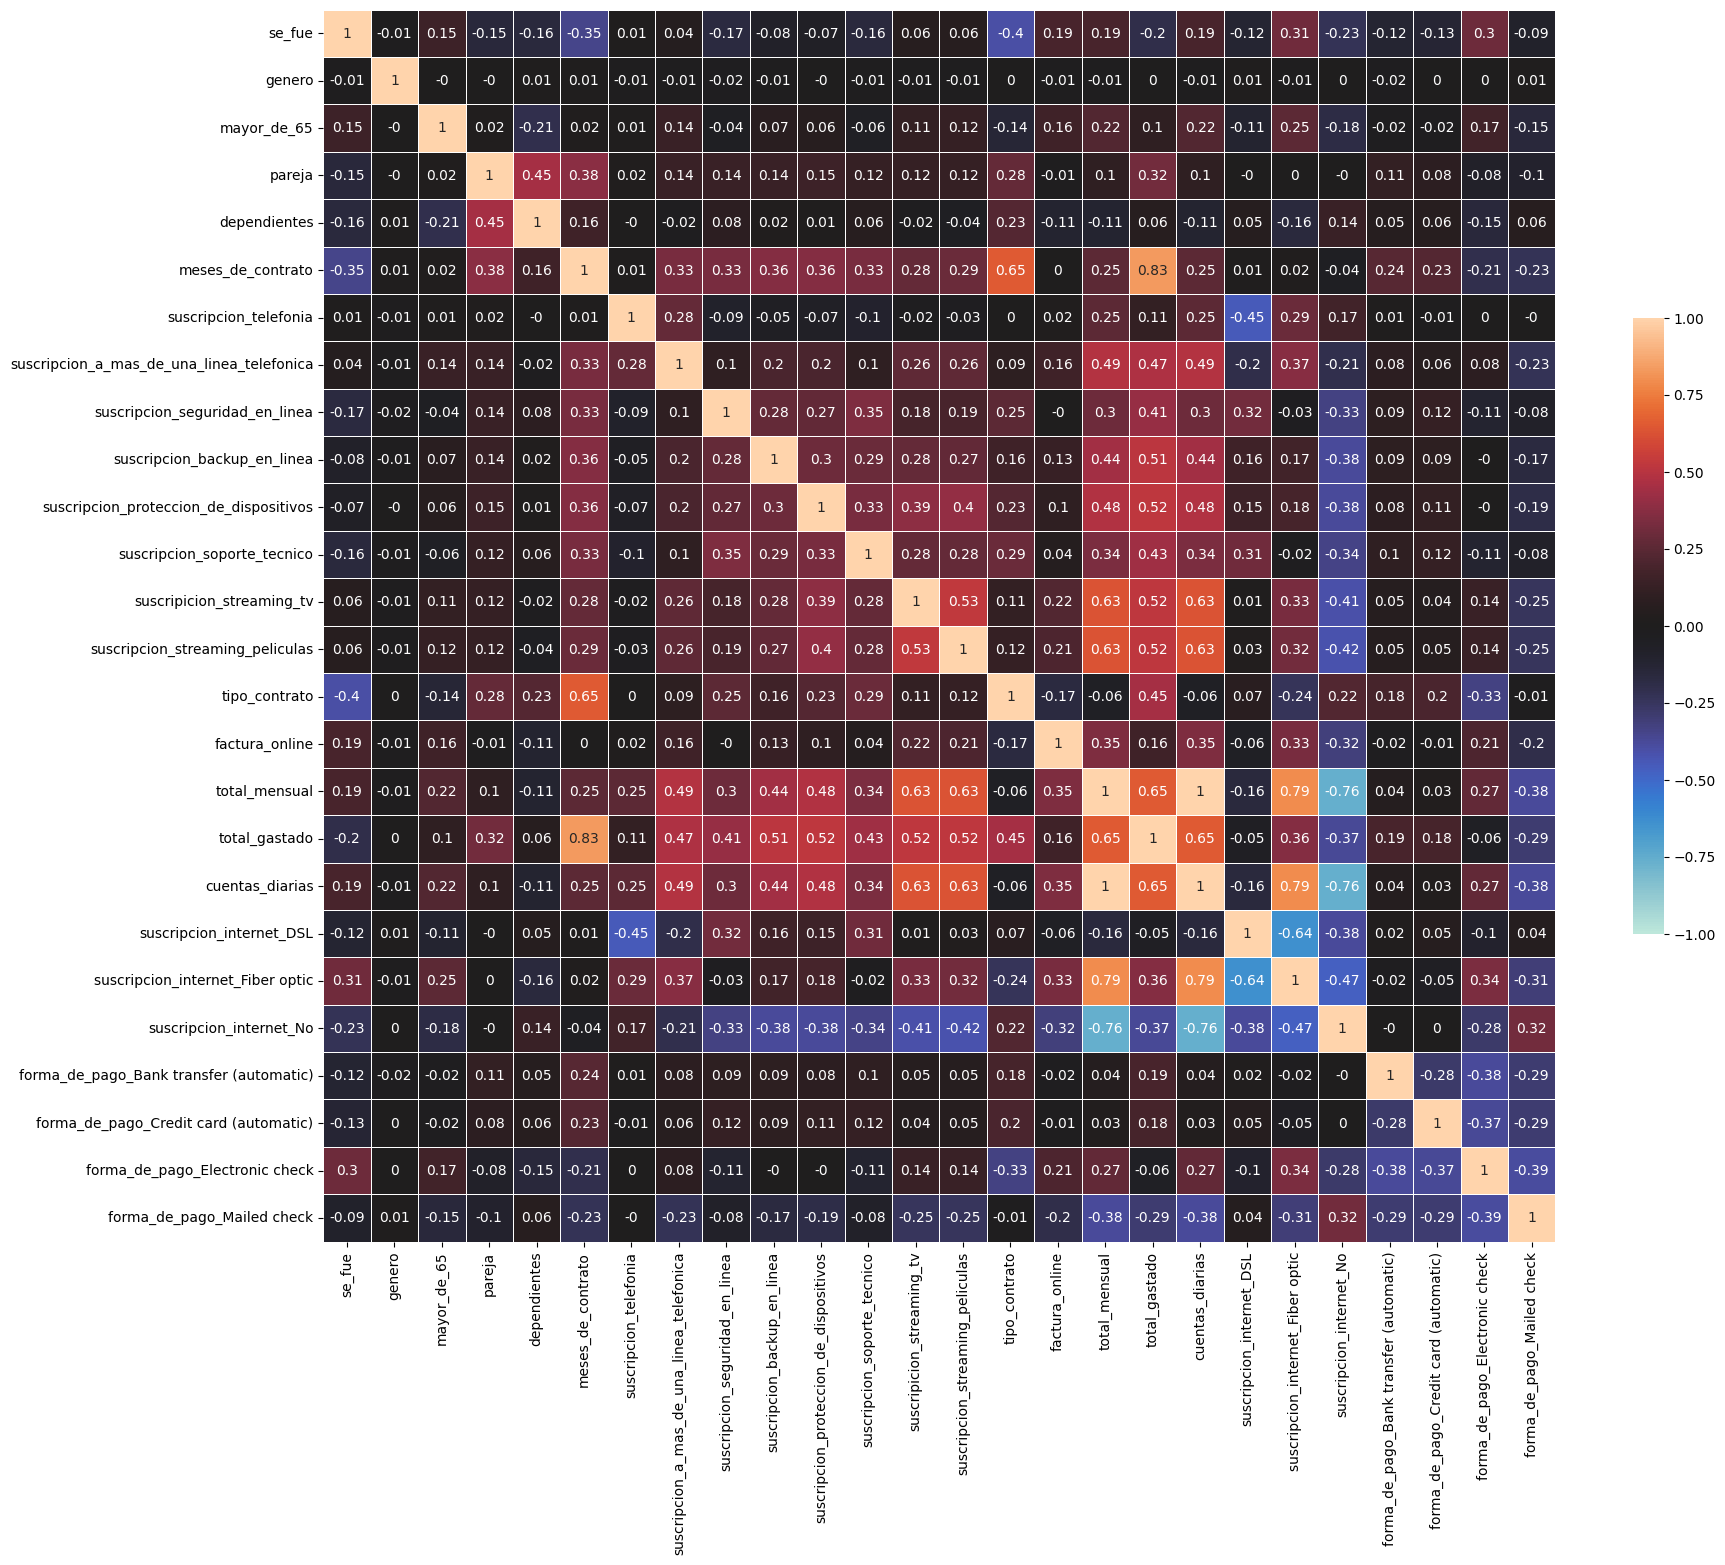

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

### Matriz de correlacion con umbral de 0.1

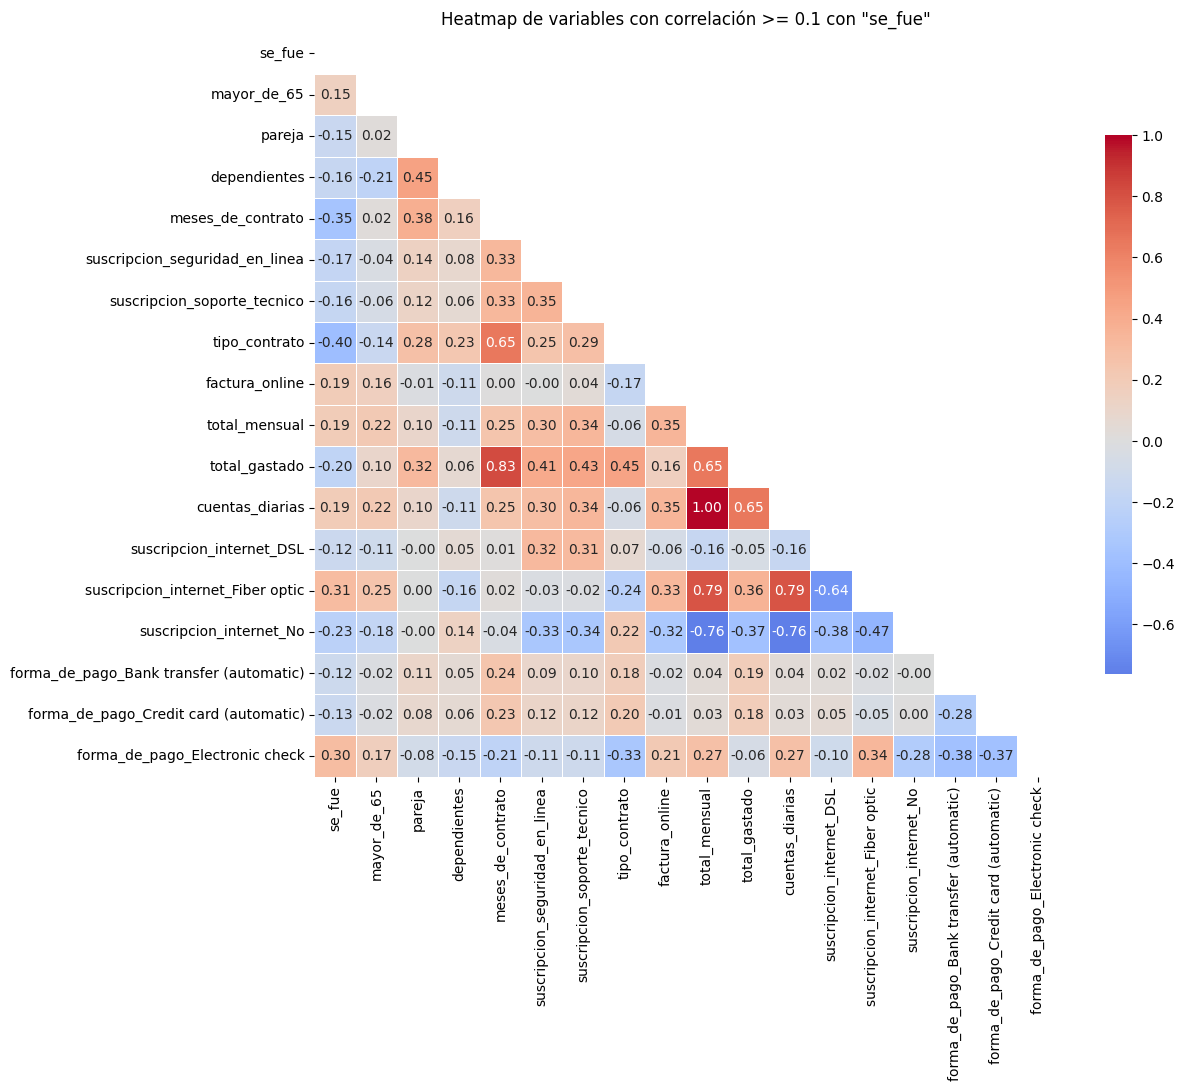

In [54]:
# Definir la variable objetivo
target_var = 'se_fue'

# Definir el umbral mínimo de correlación absoluta para selección
umbral = 0.1

# Filtrar variables que tengan correlación absoluta >= umbral con la variable objetivo
# Esto crea una lista con las variables relevantes
variables_relevantes = corr.index[abs(corr[target_var]) >= umbral].tolist()

# Asegurar que la variable objetivo esté en la lista (si no está, añadirla)
if target_var not in variables_relevantes:
    variables_relevantes.append(target_var)

# Crear una matriz de correlación solo con las variables seleccionadas
corr_filtrada = corr.loc[variables_relevantes, variables_relevantes]

# Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Graficar el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {umbral} con "{target_var}"')
plt.show()



###Análisis de Multicolinealidad

El análisis de multicolinealidad es una etapa dentro del análisis de datos que se hace antes de entrenar modelos lineales (como regresión lineal o logística) para asegurarse de que las variables independientes no estén demasiado correlacionadas entre sí.

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [56]:
#Seleccionar las variables independientes
X = df_encoded.drop(columns=['se_fue'])

#Añadir constante (intercepto)
X_const = add_constant(X)

# Convert boolean columns to integers (0 or 1)
X_const = X_const.astype(float)

# Calcular el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Mostrar resultado
display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
24,forma_de_pago_Electronic check,inf
25,forma_de_pago_Mailed check,inf
18,cuentas_diarias,inf
19,suscripcion_internet_DSL,inf
20,suscripcion_internet_Fiber optic,inf
21,suscripcion_internet_No,inf
22,forma_de_pago_Bank transfer (automatic),inf
23,forma_de_pago_Credit card (automatic),inf
16,total_mensual,inf
6,suscripcion_telefonia,34.891799


### Quitas columnas con mucha colinealidad

In [57]:
# ====== Etapa 1: Copiar X original para não modificar o original ======
X_filtered = X_const.copy()

# ====== Etapa 2: Remover variáveis com multicolinearidade perfeita (VIF = inf) ======
cols_to_drop = [
    "total_mensual",
    "cuentas_diarias","forma_de_pago_Bank transfer (automatic)","suscripcion_internet_No"
]
X_filtered.drop(columns=cols_to_drop, inplace=True)


# ====== Etapa 5: Garantir que os dados estão em float para o VIF funcionar ======
X_filtered = X_filtered.astype(float)

# ====== Etapa 6: Recalcular o VIF ======
vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

# ====== Etapa 7: Exibir os resultados ======
display(vif_data.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,40.890475
16,total_gastado,10.688958
5,meses_de_contrato,7.189772
18,suscripcion_internet_Fiber optic,4.895832
17,suscripcion_internet_DSL,3.612233
14,tipo_contrato,2.241464
20,forma_de_pago_Electronic check,1.974471
21,forma_de_pago_Mailed check,1.856683
13,suscripcion_streaming_peliculas,1.737058
12,suscripicion_streaming_tv,1.722462


### Eliminar las columnas con mucha colinealidad del df_encoded

In [58]:
df_ok=df_encoded.copy()
df_ok.drop(columns=cols_to_drop, inplace=True)
df_ok.head()

,se_fue,genero,mayor_de_65,pareja,dependientes,meses_de_contrato,suscripcion_telefonia,suscripcion_a_mas_de_una_linea_telefonica,suscripcion_seguridad_en_linea,suscripcion_backup_en_linea,...,suscripicion_streaming_tv,suscripcion_streaming_peliculas,tipo_contrato,factura_online,total_gastado,suscripcion_internet_DSL,suscripcion_internet_Fiber optic,forma_de_pago_Credit card (automatic),forma_de_pago_Electronic check,forma_de_pago_Mailed check
0,0,0,0,1,1,-0.954296,1,0,0,1,...,1,0,1,1,-0.745607,1,0,0,0,1
1,0,1,0,0,0,-0.954296,1,1,0,0,...,0,1,0,0,-0.768063,1,0,0,0,1
2,1,1,0,0,0,-1.158016,1,0,0,0,...,0,0,0,1,-0.883456,0,1,0,1,0
3,1,1,1,1,0,-0.791321,1,0,0,1,...,1,1,0,1,-0.461240,0,1,0,1,0
4,1,0,1,1,0,-1.198760,1,0,0,0,...,1,0,0,1,-0.889390,0,1,0,0,1


##🎯Analisis dirigido

###Meses de Contrato vs Se fue (Abandono)

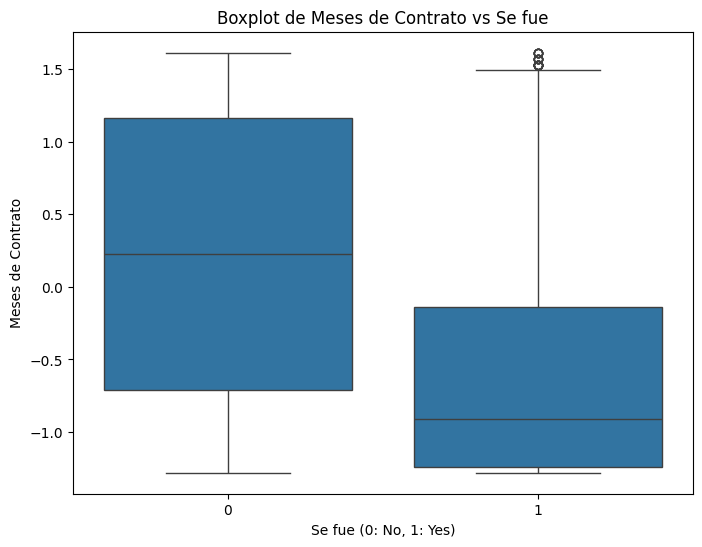

In [59]:
#boxplot o scatter meses_de_contrato × se_fue
plt.figure(figsize=(8, 6))
sns.boxplot(x='se_fue', y='meses_de_contrato', data=df_ok)
plt.title('Boxplot de Meses de Contrato vs Se fue')
plt.xlabel('Se fue (0: No, 1: Yes)')
plt.ylabel('Meses de Contrato')
plt.show()

###Total Gastado vs Se fue (Abandono)

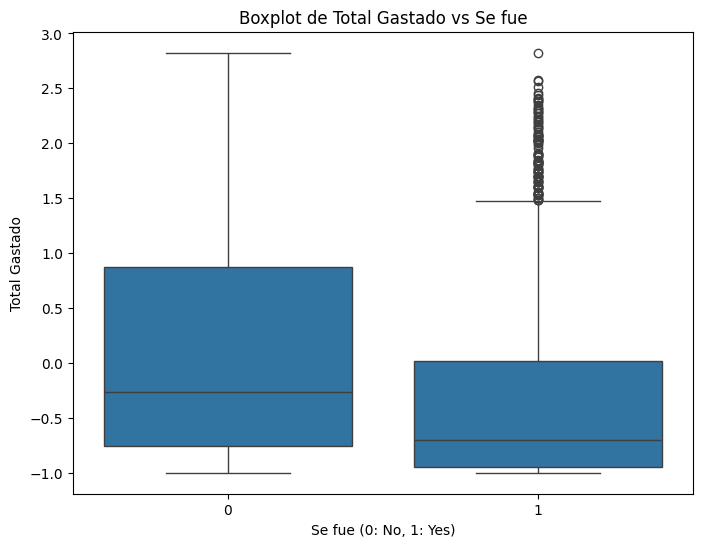

In [60]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='se_fue', y='total_gastado', data=df_ok)
plt.title('Boxplot de Total Gastado vs Se fue')
plt.xlabel('Se fue (0: No, 1: Yes)')
plt.ylabel('Total Gastado')
plt.show()

###Verificación de la Proporción de Cancelación (Churn)

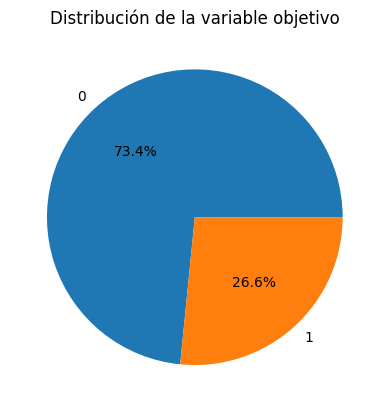

In [61]:
#grafico circular de se_fue
plt.pie(df_ok['se_fue'].value_counts(), labels=df_ok['se_fue'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribución de la variable objetivo')
plt.show()


##🤖 Modelos Predictivos

In [62]:
#Importar bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score


###Separar X e Y, y dividir conjunto de entrenamiento y testing

In [63]:
#Separar features y target
X = df_ok.drop(columns=['se_fue'])
y = df_ok['se_fue']

In [64]:
#Dividir entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


### Balancear

En un conjunto de datos, hay más registros de personas que no abandonaron que de personas que sí abandonaron. Por tal motivo, es necesario realizar un balanceo de clases, para que el modelo no esté sesgado hacia la clase mayoritaria y pueda aprender a predecir correctamente ambas clases.

Distribución después de SMOTE:
 se_fue
1    3614
0    3614
Name: count, dtype: int64


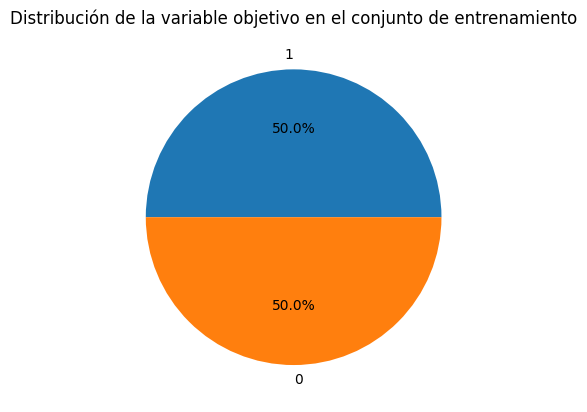

In [65]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Distribución después de SMOTE:\n", y_train_bal.value_counts())

#grafico circular de x_train se_fue
plt.pie(y_train_bal.value_counts(), labels=y_train_bal.value_counts().index, autopct='%1.1f%%')
plt.title('Distribución de la variable objetivo en el conjunto de entrenamiento')
plt.show()

### Modelo Regresión Logaritmica

Regresión Logística
Exactitud: 0.747867298578199
ROC AUC: 0.8387804678770387
Matriz de Confusión:
 [[1129  420]
 [ 112  449]]
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1549
           1       0.52      0.80      0.63       561

    accuracy                           0.75      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.81      0.75      0.76      2110



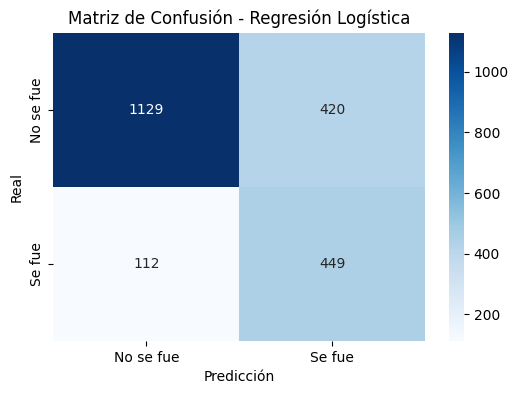

In [66]:
# Instanciar y entrenar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

# Obtener coeficientes
coeficientes = lr.coef_[0]
intercepto = lr.intercept_[0]

# Evaluación
print("Regresión Logística")
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


# Crear matriz de confusión
cm = confusion_matrix(y_test, y_pred_lr)

# Visualizar con heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No se fue", "Se fue"],
            yticklabels=["No se fue", "Se fue"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

### Modelo Random Forest

Random Forest
Exactitud: 0.7573459715639811
ROC AUC: 0.8148555390229336
Matriz de Confusión:
 [[1243  306]
 [ 206  355]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1549
           1       0.54      0.63      0.58       561

    accuracy                           0.76      2110
   macro avg       0.70      0.72      0.71      2110
weighted avg       0.77      0.76      0.76      2110



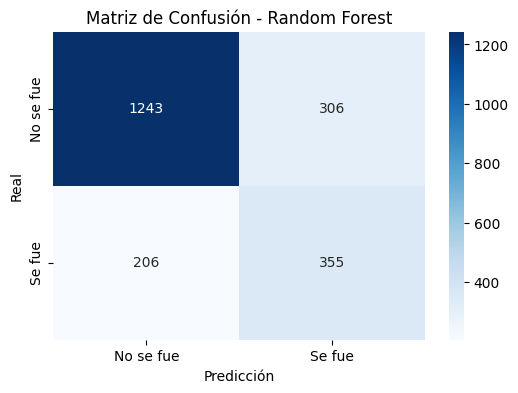

In [67]:
# Instanciar y entrenar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Evaluación
print("Random Forest")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


# Crear matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf)

# Visualizar con heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No se fue", "Se fue"],
            yticklabels=["No se fue", "Se fue"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Random Forest")
plt.show()

###Modelo Arbol de Decision

Árbol de Decisión
Exactitud: 0.7109004739336493
ROC AUC: 0.662088933231606
Matriz de Confusión:
 [[1188  361]
 [ 249  312]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1549
           1       0.46      0.56      0.51       561

    accuracy                           0.71      2110
   macro avg       0.65      0.66      0.65      2110
weighted avg       0.73      0.71      0.72      2110



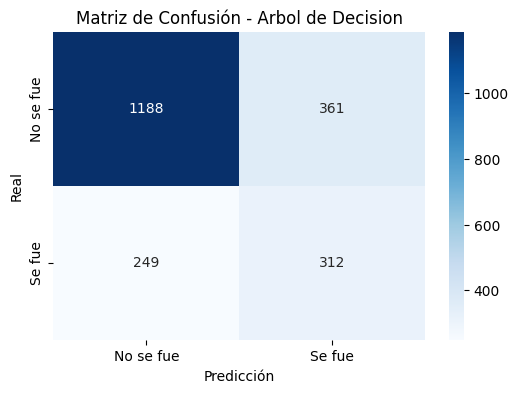

In [68]:
from sklearn.tree import DecisionTreeClassifier

# Instanciar y entrenar
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

# Evaluación
print("Árbol de Decisión")
print("Exactitud:", accuracy_score(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, y_prob_dt))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


# Crear matriz de confusión
cm = confusion_matrix(y_test, y_pred_dt)

# Visualizar con heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No se fue", "Se fue"],
            yticklabels=["No se fue", "Se fue"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Arbol de Decision")
plt.show()

###Modelo Suport Vector Machine

Support Vector Machine (SVM)
Exactitud: 0.7511848341232228
ROC AUC: 0.8182393563094587
Matriz de Confusión:
 [[1150  399]
 [ 126  435]]
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1549
           1       0.52      0.78      0.62       561

    accuracy                           0.75      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.80      0.75      0.76      2110



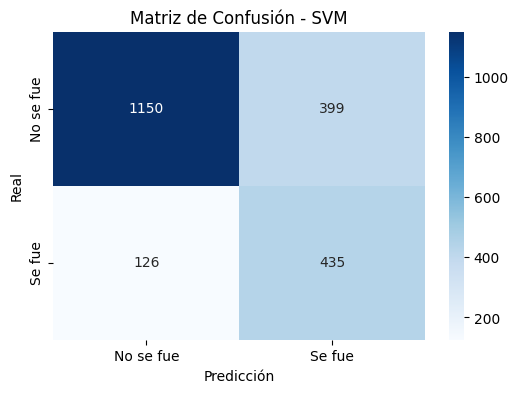

In [69]:
from sklearn.svm import SVC

# Instanciar y entrenar
# Usamos probability=True para poder obtener predict_proba
svm = SVC(random_state=42, probability=True)
svm.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:, 1]

# Evaluación
print("Support Vector Machine (SVM)")
print("Exactitud:", accuracy_score(y_test, y_pred_svm))
print("ROC AUC:", roc_auc_score(y_test, y_prob_svm))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


# Crear matriz de confusión
cm = confusion_matrix(y_test, y_pred_svm)

# Visualizar con heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No se fue", "Se fue"],
            yticklabels=["No se fue", "Se fue"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - SVM")
plt.show()

###Modelo KNN

K-Nearest Neighbors (KNN)
Exactitud: 0.7066350710900474
ROC AUC: 0.7768855532118359
Matriz de Confusión:
 [[1078  471]
 [ 148  413]]
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      1549
           1       0.47      0.74      0.57       561

    accuracy                           0.71      2110
   macro avg       0.67      0.72      0.67      2110
weighted avg       0.77      0.71      0.72      2110



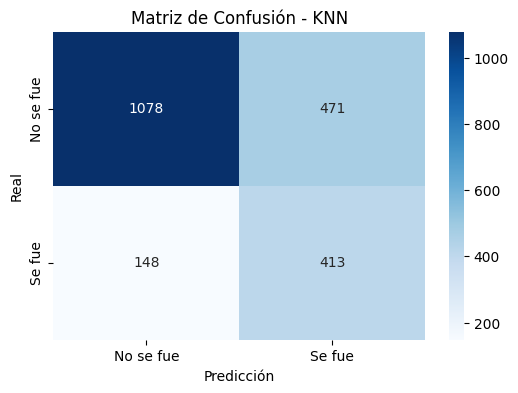

In [70]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciar y entrenar
knn = KNeighborsClassifier()
knn.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:, 1]

# Evaluación
print("K-Nearest Neighbors (KNN)")
print("Exactitud:", accuracy_score(y_test, y_pred_knn))
print("ROC AUC:", roc_auc_score(y_test, y_prob_knn))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


# Crear matriz de confusión
cm = confusion_matrix(y_test, y_pred_knn)

# Visualizar con heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No se fue", "Se fue"],
            yticklabels=["No se fue", "Se fue"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - KNN")
plt.show()

###Modelo MLP

Red Neuronal (MLP)
Exactitud: 0.7374407582938388
ROC AUC: 0.7872228532236887
Matriz de Confusión:
 [[1190  359]
 [ 195  366]]
              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1549
           1       0.50      0.65      0.57       561

    accuracy                           0.74      2110
   macro avg       0.68      0.71      0.69      2110
weighted avg       0.76      0.74      0.75      2110



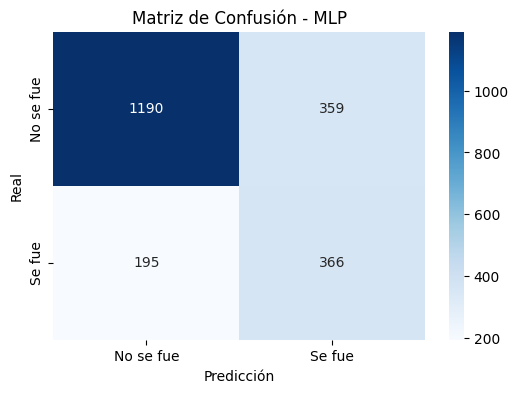

In [71]:
from sklearn.neural_network import MLPClassifier

# Instanciar y entrenar
mlp = MLPClassifier(random_state=42, max_iter=1000) # max_iter increased for convergence
mlp.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_mlp = mlp.predict(X_test)
y_prob_mlp = mlp.predict_proba(X_test)[:, 1]

# Evaluación
print("Red Neuronal (MLP)")
print("Exactitud:", accuracy_score(y_test, y_pred_mlp))
print("ROC AUC:", roc_auc_score(y_test, y_prob_mlp))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))


# Crear matriz de confusión
cm = confusion_matrix(y_test, y_pred_mlp)

# Visualizar con heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No se fue", "Se fue"],
            yticklabels=["No se fue", "Se fue"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - MLP")
plt.show()

###Curva ROC de los 6 modelos

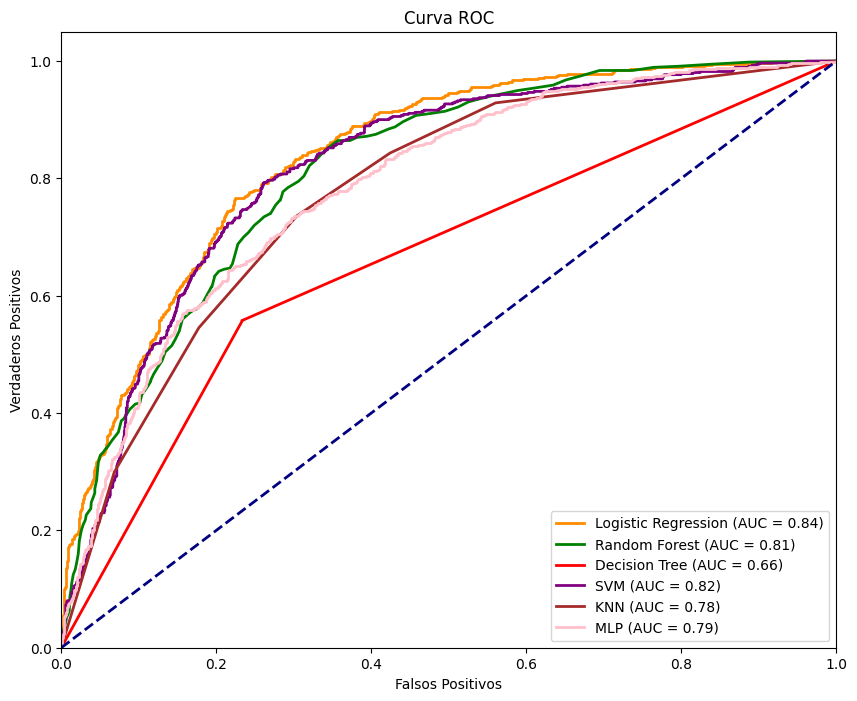

In [72]:
from sklearn.metrics import roc_curve, auc
# Calculo curva ROC de Logistic Regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Calculo curva ROC de Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Calculo curva ROC de Decision Tree
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Calculo curva ROC de SVM
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Calculo curva ROC de KNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Calculate ROC curve for MLP
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_prob_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Plot de las curvas ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_svm, tpr_svm, color='purple', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot(fpr_knn, tpr_knn, color='brown', lw=2, label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_mlp, tpr_mlp, color='pink', lw=2, label='MLP (AUC = %0.2f)' % roc_auc_mlp)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

###Modelo Ajustado

Fitting 5 folds for each of 56 candidates, totalling 280 fits
Mejores parámetros: {'C': 1, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}
Mejor score (ROC AUC): 0.8606889634273877
Regresión Logística ajustado
Exactitud: 0.7483412322274882
ROC AUC: 0.8388656243059465
Matriz de Confusión:
 [[1131  418]
 [ 113  448]]
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1549
           1       0.52      0.80      0.63       561

    accuracy                           0.75      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.80      0.75      0.76      2110



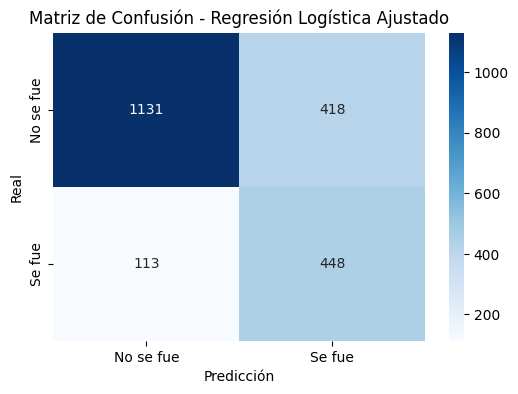

In [73]:
#ajustar el modelo
from sklearn.model_selection import GridSearchCV

# Definir modelo base
lr = LogisticRegression(random_state=42)

# Definir espacio de búsqueda de hiperparámetros
param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100,1000],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"],
    "max_iter": [500, 1000]
}

# Configurar GridSearch con validación cruzada
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring="roc_auc", n_jobs=-1, verbose=1)

# Entrenar
grid_search.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_lr2 = grid_search.predict(X_test)
y_prob_lr2 = grid_search.predict_proba(X_test)[:, 1]

print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score (ROC AUC):", grid_search.best_score_)


# Evaluación
print("Regresión Logística ajustado")
print("Exactitud:", accuracy_score(y_test, y_pred_lr2))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr2))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr2))
print(classification_report(y_test, y_pred_lr2))

# Crear matriz de confusión
cm = confusion_matrix(y_test, y_pred_lr2)

# Visualizar con heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No se fue", "Se fue"],
            yticklabels=["No se fue", "Se fue"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Regresión Logística Ajustado")
plt.show()

###Evaluación de los Modelos

In [74]:
#mostrar las metricas de todos los model_selection
# Crear una lista para guardar resultados
resultados = []

# Función para evaluar y guardar métricas
def evaluar_modelo(nombre, modelo,y_test, y_pred,y_prob):

    resultados.append({
        "Modelo": nombre,
        "Exactitud": round(accuracy_score(y_test, y_pred),2),
        "Precisión": round(precision_score(y_test, y_pred),2),
        "Recall": round(recall_score(y_test, y_pred),2),
        "F1 Score": round(f1_score(y_test, y_pred),2),
        "ROC AUC": round(roc_auc_score(y_test, y_pred),2)
    })

# Ejemplo con 6 modelos (cambiá los nombres y variables según los tuyos)
evaluar_modelo("Regresión Logística", lr, y_test, y_pred_lr,y_prob_lr)
evaluar_modelo("Regresión Logística ajustado", lr, y_test, y_pred_lr2,y_prob_lr2)
evaluar_modelo("Random Forest", rf, y_test, y_pred_rf,y_prob_rf)
evaluar_modelo("SVM", svm, y_test, y_pred_svm,y_prob_svm)
evaluar_modelo("KNN", knn, y_test, y_pred_knn,y_prob_knn)
evaluar_modelo("Árbol de Decisión", dt, y_test, y_pred_dt,y_prob_dt)
evaluar_modelo("MLP", mlp, y_test, y_pred_mlp,y_prob_mlp)


# Pasar resultados a un DataFrame
df_resultados = pd.DataFrame(resultados)

df_resultados.sort_values(by="ROC AUC", ascending=False)

,Modelo,Exactitud,Precisión,Recall,F1 Score,ROC AUC
0,Regresión Logística,0.75,0.52,0.80,0.63,0.76
1,Regresión Logística ajustado,0.75,0.52,0.80,0.63,0.76
3,SVM,0.75,0.52,0.78,0.62,0.76
2,Random Forest,0.76,0.54,0.63,0.58,0.72
4,KNN,0.71,0.47,0.74,0.57,0.72
6,MLP,0.74,0.50,0.65,0.57,0.71
5,Árbol de Decisión,0.71,0.46,0.56,0.51,0.66


Dado que el objetivo del negocio es detectar el abandono (se_va).

En este caso, nos importa más detectar correctamente a los que se van (Recall alto)
que evitar falsos positivos.

Un Recall alto significa menos clientes que abandonan y pasan desapercibidos. También conviene mirar F1, porque equilibra Precisión y Recall.

El mejor modelo para el problema de abandono es la **Regresión Logística**, seguido de **SVM**, porque maximizan el Recall (0.80 / 0.78) y mantienen un buen F1 y ROC AUC (0.76).

In [78]:
import pickle

# Guardar modelo Ganador
with open('champion_modelo_logistico.pkl', 'wb') as f:
    pickle.dump(lr, f)

## 📝 Interpretación

In [75]:
coef_df = pd.DataFrame({"Variable": X_train_bal.columns, "Coeficiente": coeficientes})
coef_df = coef_df.sort_values(by="Coeficiente", ascending=False)
coef_df

,Variable,Coeficiente
17,suscripcion_internet_Fiber optic,1.433549
15,total_gastado,1.352882
16,suscripcion_internet_DSL,0.739526
14,factura_online,0.214775
11,suscripicion_streaming_tv,0.051640
12,suscripcion_streaming_peliculas,0.039636
19,forma_de_pago_Electronic check,0.028179
6,suscripcion_a_mas_de_una_linea_telefonica,-0.056137
1,mayor_de_65,-0.093627
9,suscripcion_proteccion_de_dispositivos,-0.214639


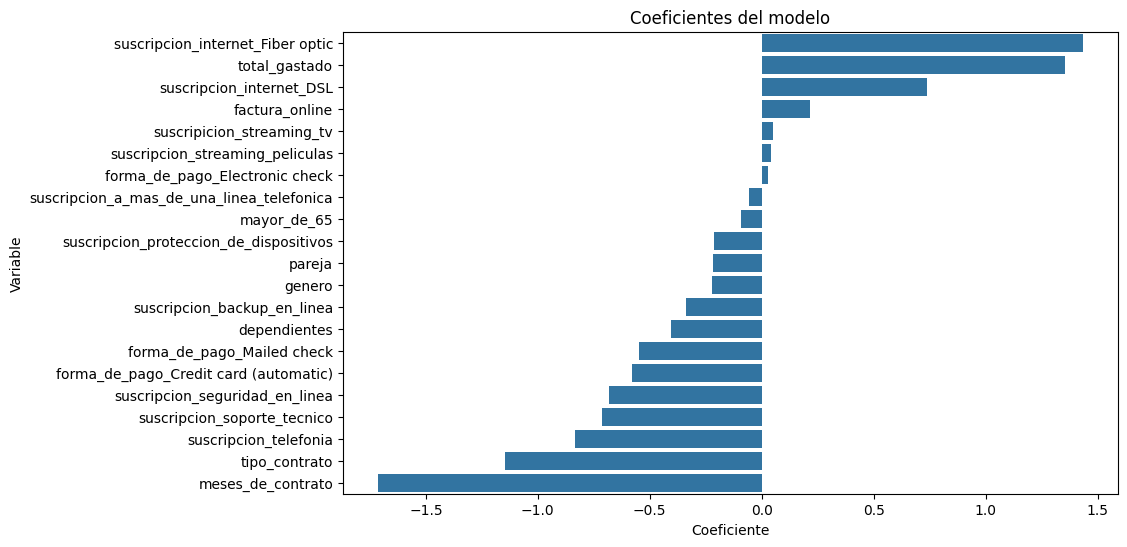

In [76]:
#graficar los coef_df
plt.figure(figsize=(10, 6))
sns.barplot(x="Coeficiente", y="Variable", data=coef_df)
plt.title("Coeficientes del modelo")
plt.show()

In [77]:
#Odds Ratio es una forma de medir cuánto cambia la probabilidad de que ocurra algo según una variable.

# Calcular a Odds Ratio
coef_df["Odds Ratio"] = np.exp(coef_df["Coeficiente"])

# Interpretación básica
#coef_df["Impacto"] = coef_df["Coeficiente"].apply(
#    lambda x: "Aumenta el Abandono" if x > 0 else "Reduce Abandono"
#)

#coef_df


# Calcular % de cambio en la probabilidad
def interpretar(odds):
    if odds > 1:
        return f"Aumenta {(odds - 1) * 100:.1f}% la prob. de cancelar"
    else:
        return f"Reduce {(1 - odds) * 100:.1f}% la prob. de cancelar"

coef_df["Impacto (%)"] = coef_df["Odds Ratio"].apply(interpretar)

# Ordenar por impacto relativo (mayor aumento a mayor reducción)
df_coef_sorted = coef_df.sort_values(by="Odds Ratio", ascending=False)

df_coef_sorted

,Variable,Coeficiente,Odds Ratio,Impacto (%)
17,suscripcion_internet_Fiber optic,1.433549,4.193555,Aumenta 319.4% la prob. de cancelar
15,total_gastado,1.352882,3.868558,Aumenta 286.9% la prob. de cancelar
16,suscripcion_internet_DSL,0.739526,2.094942,Aumenta 109.5% la prob. de cancelar
14,factura_online,0.214775,1.239583,Aumenta 24.0% la prob. de cancelar
11,suscripicion_streaming_tv,0.051640,1.052996,Aumenta 5.3% la prob. de cancelar
12,suscripcion_streaming_peliculas,0.039636,1.040432,Aumenta 4.0% la prob. de cancelar
19,forma_de_pago_Electronic check,0.028179,1.028579,Aumenta 2.9% la prob. de cancelar
6,suscripcion_a_mas_de_una_linea_telefonica,-0.056137,0.945409,Reduce 5.5% la prob. de cancelar
1,mayor_de_65,-0.093627,0.910622,Reduce 8.9% la prob. de cancelar
9,suscripcion_proteccion_de_dispositivos,-0.214639,0.806833,Reduce 19.3% la prob. de cancelar


####**Factores que aumenta el Abandono**

*   Los clientes con fibra óptica tienen 4.2 veces más probabilidades de cancelar que los que no la tienen.
*   A mayor gasto total, crece fuertemente la probabilidad de cancelar.
*   Los que usan DSL tienen el doble de probabilidad de cancelar.
*   Los que usan factura online tienen un 24% más de probabilidad de cancelar.

**El tipo de suscripción a Internet y el monto total gastado son los factores de mayor riesgo.**

Algunas preferencias operativas, como la facturación online, también aumentan la probabilidad de abandono aunque en menor medida.

####**Factores que disminuyen el Abandono**
*   El soporte técnico reduce la cancelación en 51%.
*   Contratos más largos reducen la probabilidad de cancelar en un 68%.
*   A más meses de contrato, la probabilidad de cancelar se reduce en un 82%.
*   La seguridad en línea también protege la retención en un 50%

**Los contratos largos y servicios de soporte o seguridad fomentan la fidelidad del cliente.**




##✅Conclusión: Estrategias para la retención

**Incentivar contratos largos:**

*   Ofrecer descuentos o beneficios por comprometerse a contratos de mayor duración.
*   Resaltar la estabilidad y ventajas de permanecer a largo plazo.

**Mejorar soporte técnico y servicios adicionales:**

*   Promocionar soporte técnico, seguridad en línea y respaldo de datos.
*   Implementar programas de ayuda proactiva para clientes con riesgo alto.

**Segmentar clientes de alto riesgo:**

*   Clientes con fibra óptica o DSL y alto gasto total son más propensos a cancelar.
*   Crear campañas personalizadas: ofertas especiales, planes más flexibles, upgrades o bundles

**Optimizar la experiencia online:**

*   Facturación online aumenta levemente la cancelación; se puede acompañar con beneficios o tutoriales que hagan la experiencia más clara y cómoda.

